In [3]:
from preprocessing import preprocessing_data

options = {'Standarize' : False}
X_train, y_train, X_test, y_test  = preprocessing_data("data/regularite-mensuelle-tgv-aqst.csv", options)

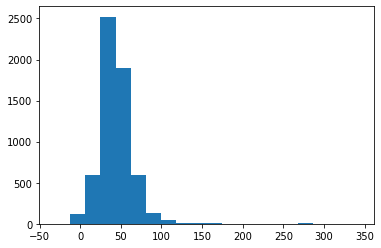

In [8]:
import matplotlib.pyplot as plt

plt.hist(y_train['total_retard_mean'], bins=20)
plt.show()

In [44]:
from sklearn.multioutput import MultiOutputRegressor

# fitting
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(X_train, y_train)

# predicting
y_pred = multioutputregressor.predict(X_test)
print(np.mean((y_pred - y_test)**2, axis=0))  # 0.004, 0.003, 0.005

[12:06:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [63]:
import pandas as pd

y_pred_df = pd.DataFrame(y_pred, columns = list("pred_" + y_test.columns))

y_pred_analisis = pd.concat([y_test, y_pred_df], axis=1)

y_pred_analisis[["prct_cause_externe", "pred_prct_cause_externe"]]

,prct_cause_externe,pred_prct_cause_externe
0,8.333333,39.036739
1,50.000000,33.699638
2,57.142857,29.909212
3,31.578947,22.713713
4,30.434783,28.394712
...,...,...
1481,40.000000,29.284702
1482,12.727273,21.576761
1483,37.500000,21.109308
1484,0.000000,16.846106


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

# define the grid of parameters to try
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.1, 0.5],
}

# create the MultiOutputRegressor model with XGBRegressor
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear'))

# create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=multioutputregressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
)

# fit the model
grid_search.fit(X_train, y_train)

# get the best model
best_model = grid_search.best_estimator_

# predict
y_pred = best_model.predict(X_test)

# print the MSE
print(np.mean((y_pred - y_test)**2, axis=0))

[12:22:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [66]:
# Get the best parameters
best_params = grid_search.best_params_
best_params

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 5,
 'estimator__n_estimators': 100}

In [73]:
import json

# Get the best parameters
best_params = grid_search.best_params_

# Convert the best parameters dictionary to a JSON string
best_params_json = json.dumps(best_params, indent=4)

# Write the JSON string to a text file
with open('best_params_XgBoost.txt', 'w') as f:
    f.write(best_params_json)

best_params

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 5,
 'estimator__n_estimators': 100}

In [78]:
# Get the cv_results_ attribute of the GridSearchCV object
cv_results = grid_search.cv_results_

# Convert the cv_results_ dictionary to a Pandas DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Save the Pandas DataFrame to a text file
cv_results_df.to_csv('cv_results_XgBoost.csv', index=False)

cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__learning_rate,param_estimator__max_depth,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.165753,0.098253,0.127701,0.014183,0.01,3,100,"{'estimator__learning_rate': 0.01, 'estimator_...",-277.308408,-259.599751,-277.535427,-262.843084,-288.927610,-273.242856,10.726192,27
1,6.135551,0.361911,0.123743,0.010551,0.01,3,200,"{'estimator__learning_rate': 0.01, 'estimator_...",-208.713556,-191.407326,-206.894254,-196.735056,-217.578340,-204.265707,9.230032,17
2,9.399069,0.092145,0.130883,0.004472,0.01,3,300,"{'estimator__learning_rate': 0.01, 'estimator_...",-197.187480,-179.771835,-194.595879,-185.305614,-205.393597,-192.450881,9.015135,11
3,6.996152,1.115441,0.181388,0.021717,0.01,5,100,"{'estimator__learning_rate': 0.01, 'estimator_...",-271.602297,-253.825887,-271.289834,-258.014107,-281.010180,-267.148461,9.900124,26
4,12.605016,0.712132,0.174466,0.033750,0.01,5,200,"{'estimator__learning_rate': 0.01, 'estimator_...",-202.051804,-183.479121,-199.822298,-190.329952,-209.854237,-197.107482,9.229988,14


In [79]:
# Get the results of the grid search for each cross-validation fold
cv_results = grid_search.cv_results_

# Print the results of the grid search for each cross-validation fold
for i in range(len(cv_results['mean_test_score'])):
    print('Fold {}: mean score: {}, stddev: {}'.format(i, cv_results['mean_test_score'][i], cv_results['std_test_score'][i]))

Fold 0: mean score: -273.2428560389188, stddev: 10.726191858920986
Fold 1: mean score: -204.26570663124693, stddev: 9.230032385021394
Fold 2: mean score: -192.45088073051545, stddev: 9.01513545983288
Fold 3: mean score: -267.14846098756186, stddev: 9.900124028566237
Fold 4: mean score: -197.10748233257016, stddev: 9.229988498671846
Fold 5: mean score: -186.14142094241873, stddev: 9.448321833994555
Fold 6: mean score: -263.4748470695163, stddev: 9.593653734208221
Fold 7: mean score: -193.94527237252882, stddev: 8.950227788707185
Fold 8: mean score: -183.802826578591, stddev: 8.811341513665527
Fold 9: mean score: -184.63820284926297, stddev: 9.381163316535806
Fold 10: mean score: -183.60489898256122, stddev: 9.564213763510732
Fold 11: mean score: -184.36770490367567, stddev: 9.13546121953172
Fold 12: mean score: -182.61028389600372, stddev: 9.463847281135761
Fold 13: mean score: -185.8496198365061, stddev: 8.877237271409498
Fold 14: mean score: -189.76712213626402, stddev: 8.701950357733

In [8]:
import pickle

# # get the best model
# best_model = grid_search.best_estimator_

# # save the best model to a file
# with open('best_model_XgBoost.pkl', 'wb') as f:
#     pickle.dump(best_model, f)


# load the best model from the file
with open('best_model_XgBoost.pkl', 'rb') as f:
    best_model = pickle.load(f)

# make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = list("pred_" + y_test.columns))


In [7]:
def plot_pred_true(y_test, y_pred):

    y_total = pd.concat([y_test, y_pred], axis=1)

    for column in y_test.columns:
        # calculate error
        y_total[f"{column}_dif"] = abs(y_test[column] - y_pred["pred_" +column])

        print(f"{column} MSR")

        # Sort by error
        y_sorted = y_total.sort_values(by=[f"{column}_dif"])

        fig, ax = plt.subplots(figsize=(30, 5))
        # Create a scatter plot of the predicted data
        plt.scatter(y_pred.index, y_sorted["pred_" + column], marker='x', color='red', label='Predicted')

        # Create a scatter plot of the real data
        plt.scatter(y_pred.index, y_sorted[column], marker='o', color='blue', label='Real')

        # Add a title and axis labels to the plot
        plt.title(f'Plot predicted and real values of {column}')
        # plt.xlabel('X')
        # plt.ylabel('Y')

        # Show the plot
        plt.show()


prct_cause_externe MSR


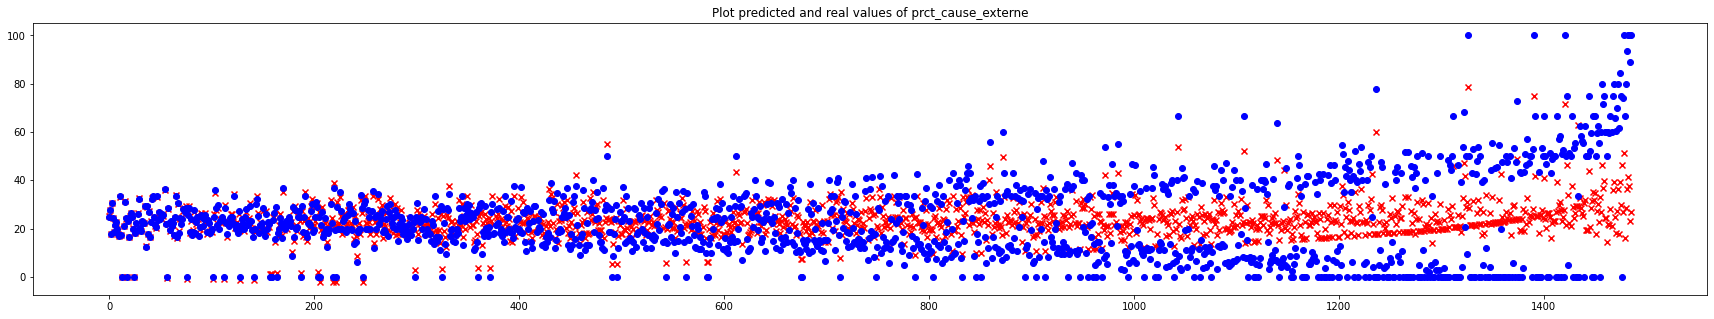

prct_cause_infra MSR


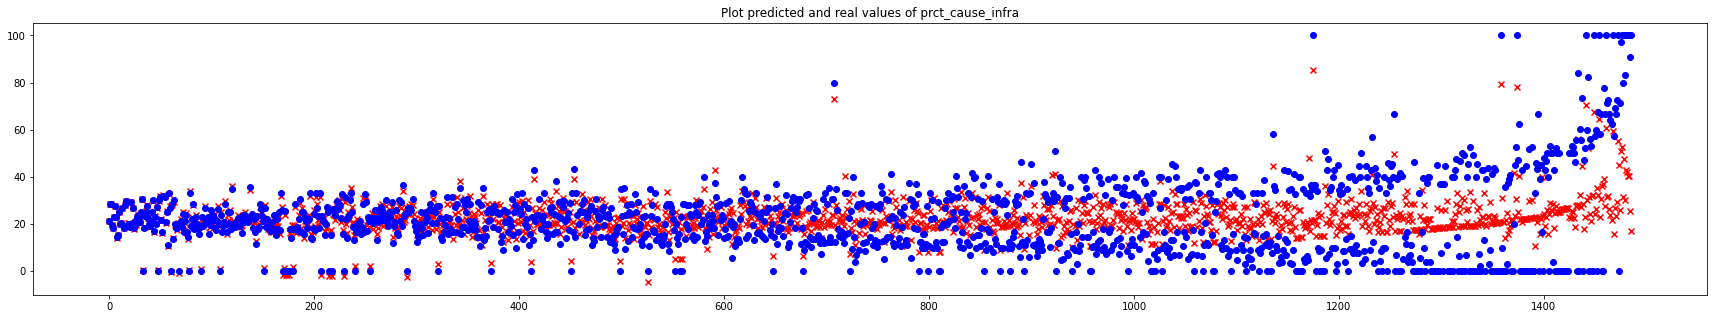

prct_cause_gestion_trafic MSR


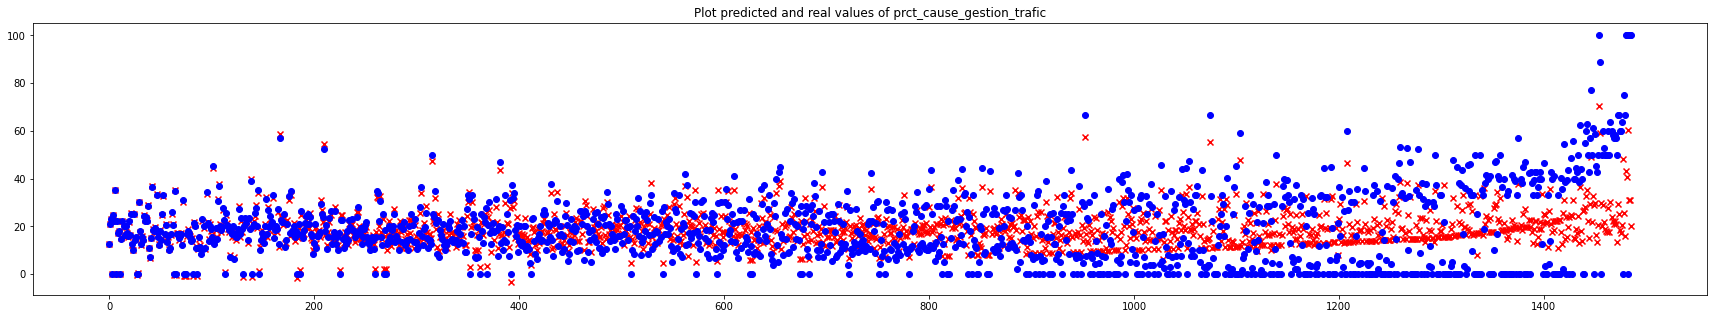

prct_cause_materiel_roulant MSR


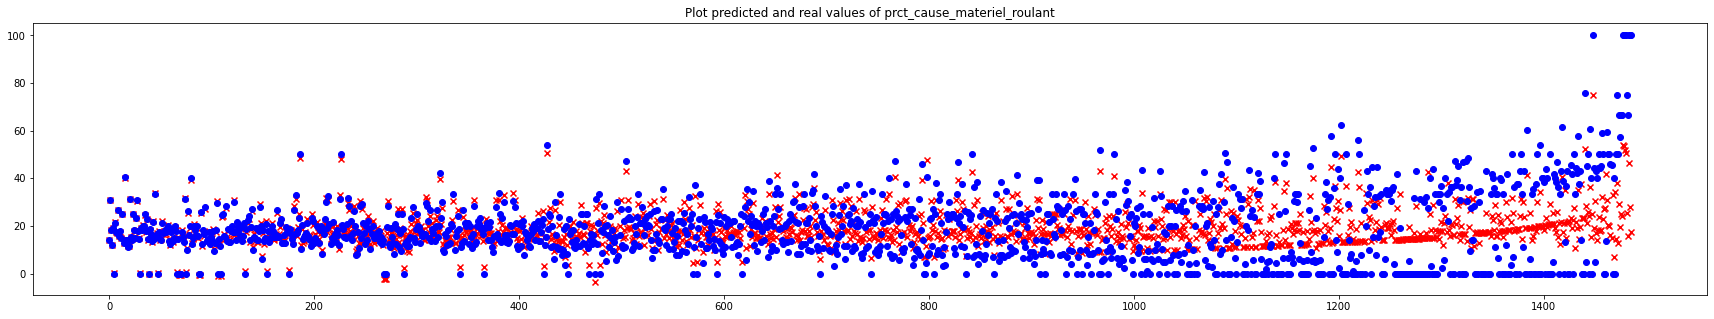

prct_cause_gestion_gare MSR


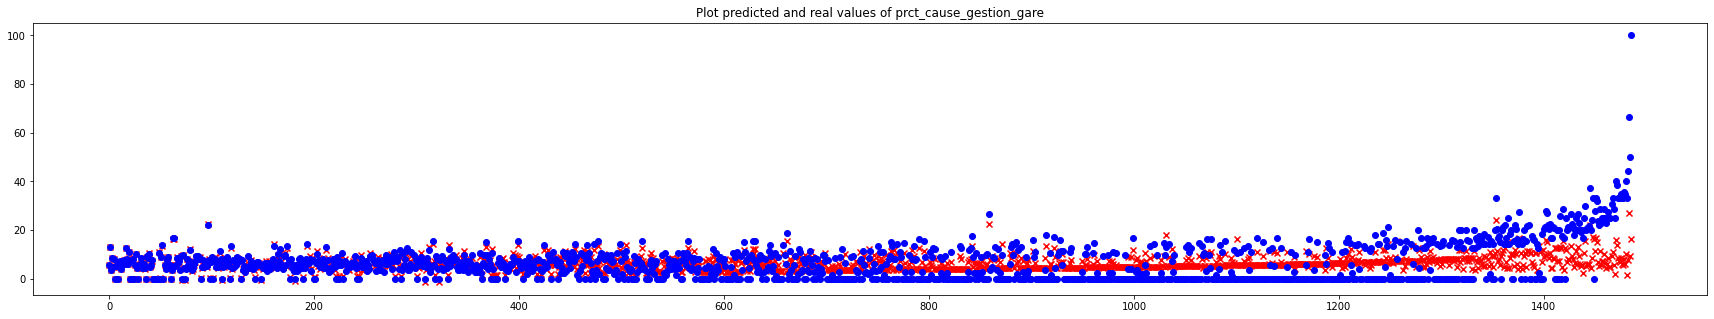

prct_cause_prise_en_charge_voyageurs MSR


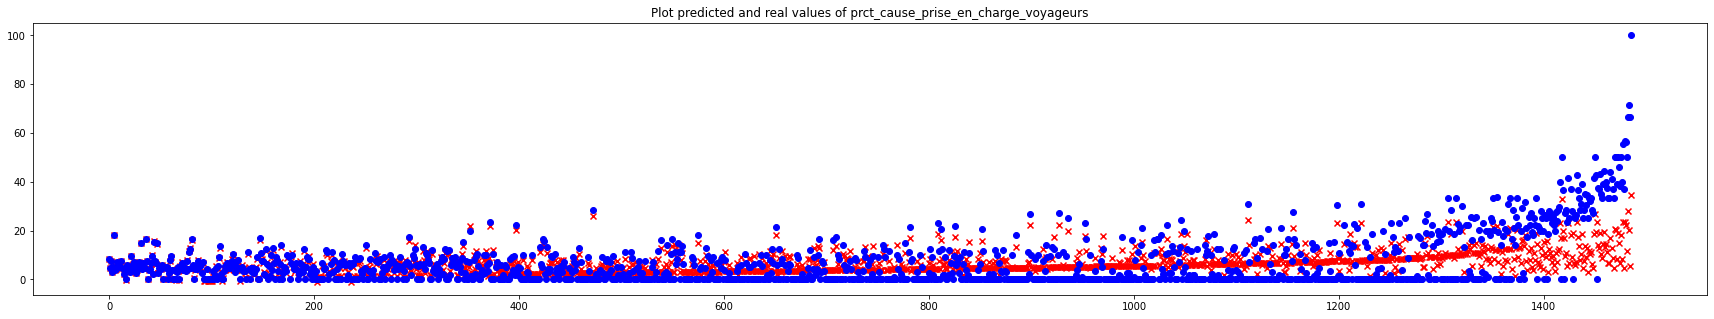

total_retard_mean MSR


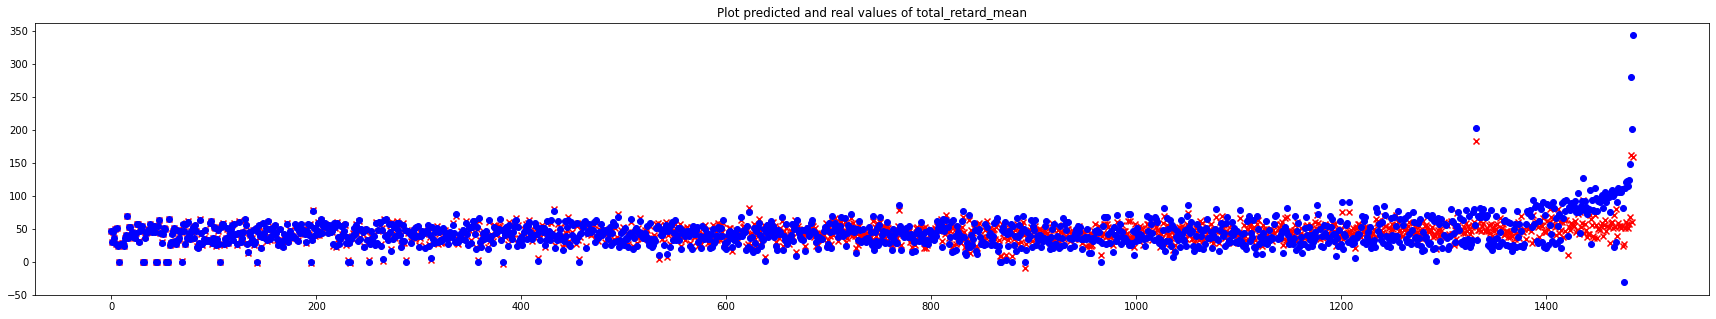

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the best model
#best_model = grid_search.best_estimator_

# Make predictions on the test set
#y_pred = best_model.predict(X_test) 
y_pred = pd.DataFrame(y_pred, columns = list("pred_" + y_test.columns))

plot_pred_true(y_test, y_pred)

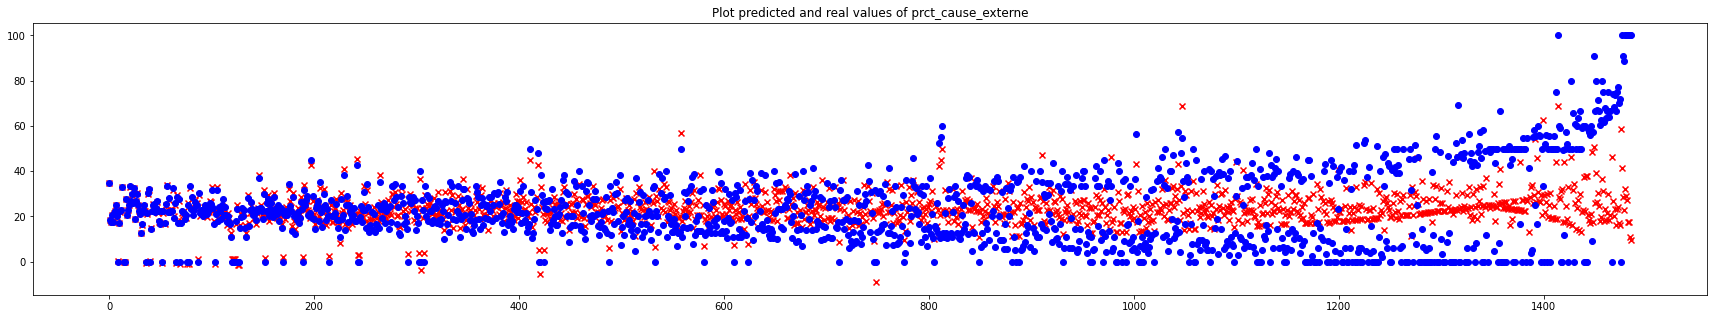

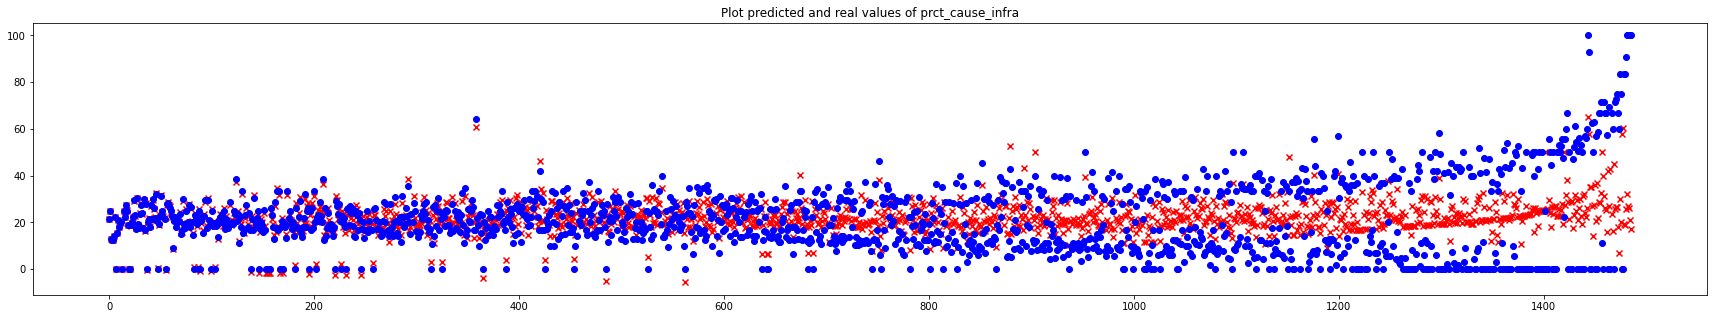

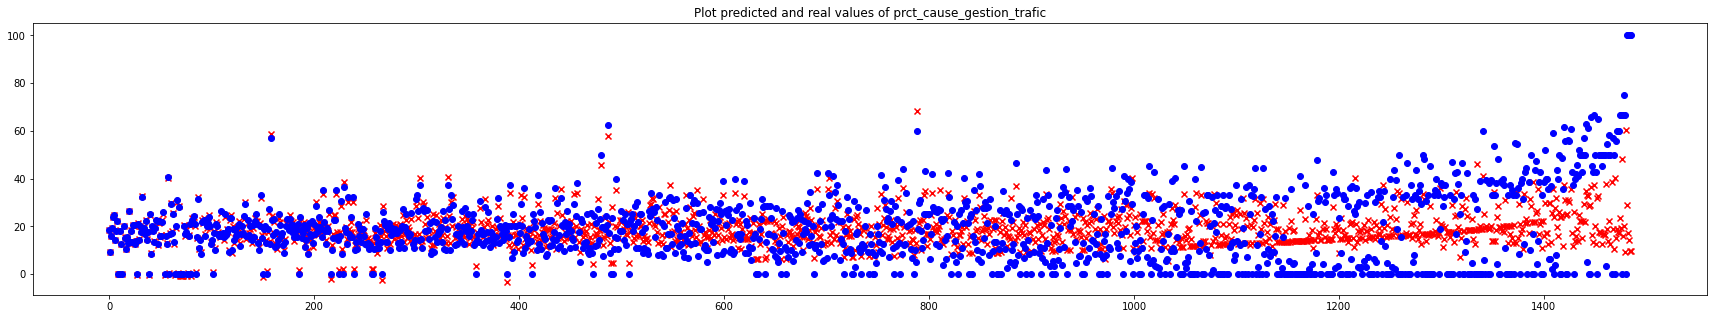

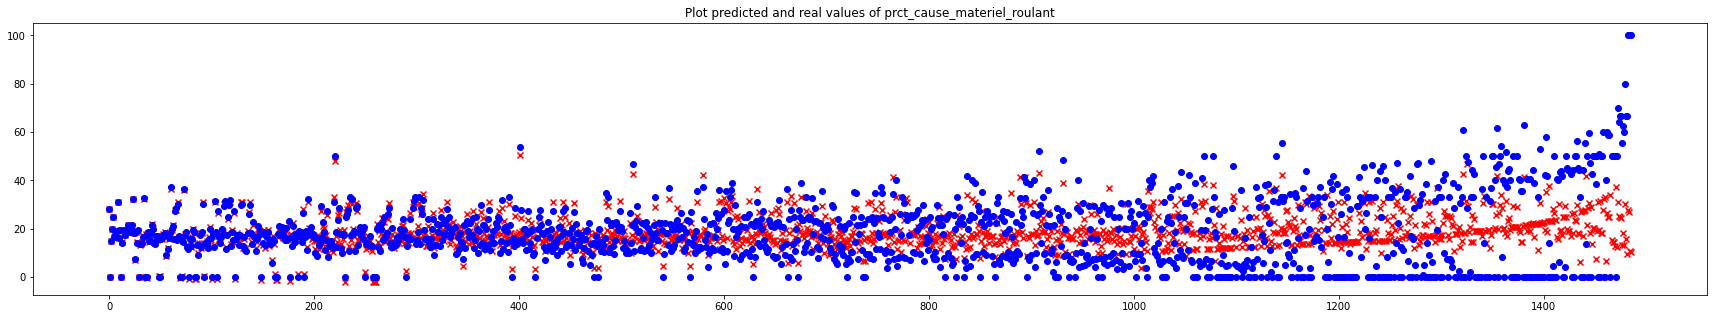

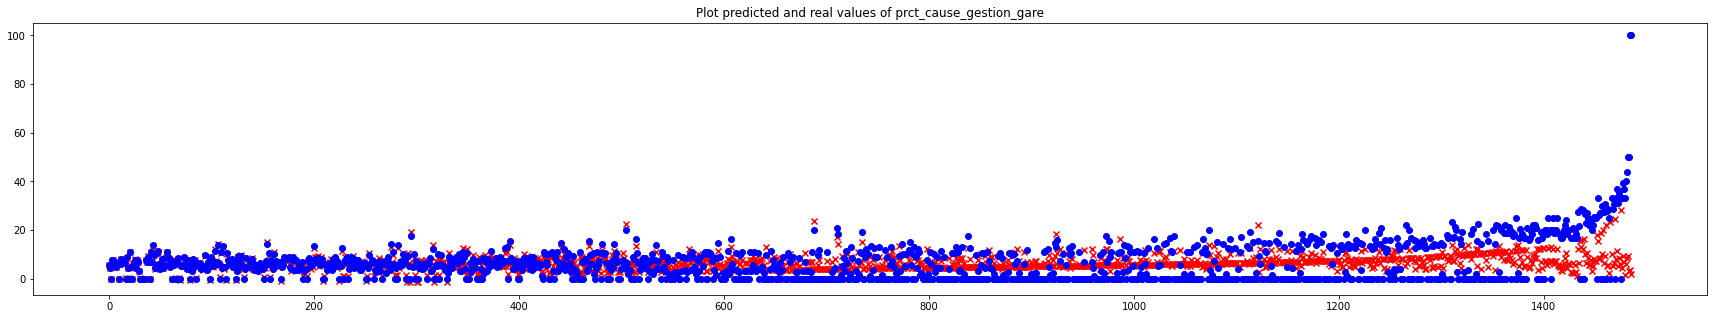

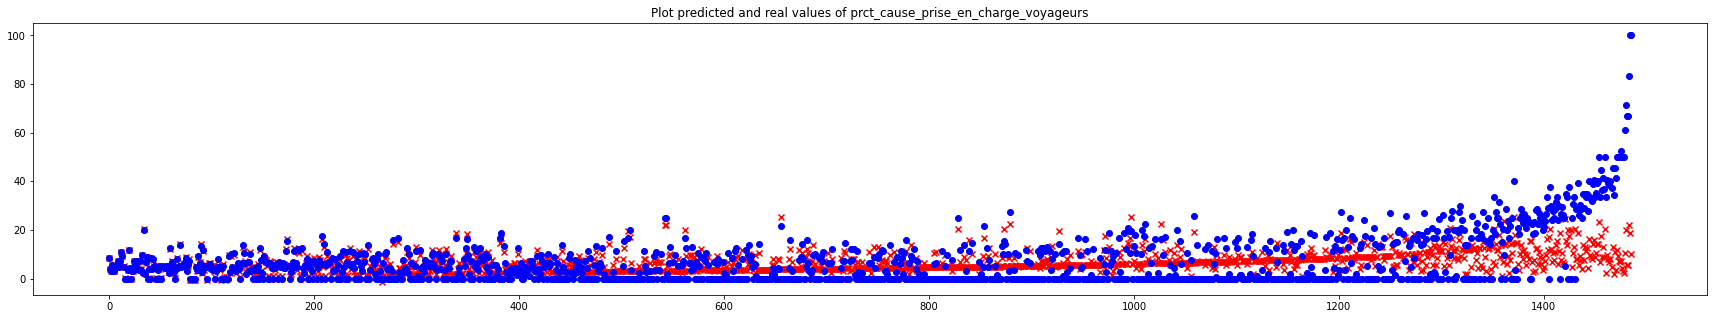

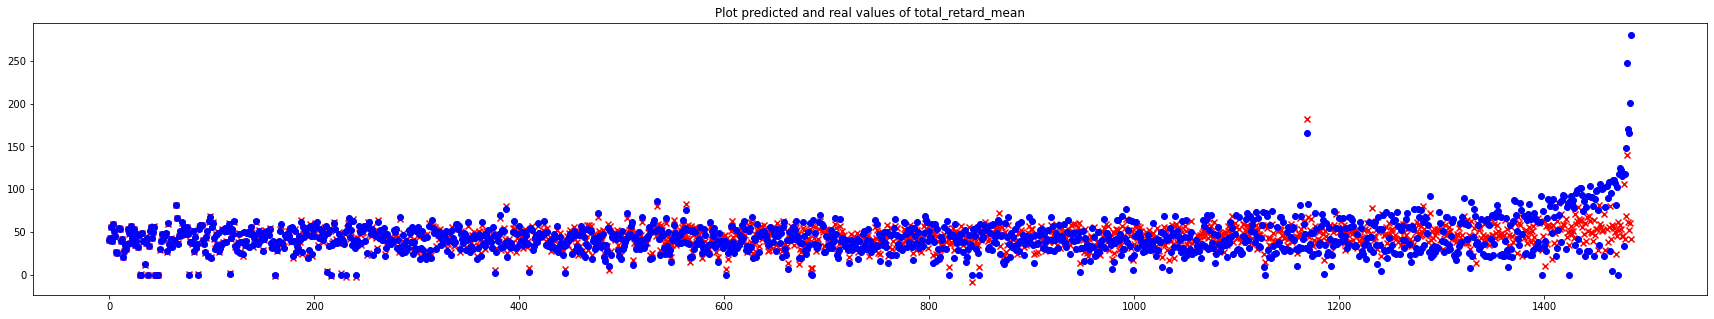

In [139]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test) 
y_pred = pd.DataFrame(y_pred, columns = list("pred_" + y_test.columns))

plot_pred_true(y_test, y_pred)

In [14]:
# load the best model from the file
with open('best_model_XgBoost.pkl', 'rb') as f:
    best_model = pickle.load(f)

# make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = list("pred_" + y_test.columns))

In [21]:
import sklearn.metrics as metrics

r2_score = metrics.r2_score(y_test, y_pred)
print("r2_score: ", r2_score)

mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
print("mean_squared_error: ", mean_squared_error)

r2_score:  0.39135145105406705
mean_squared_error:  136.43597983136257
